In [1]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException

In [2]:
def cache(fn):
    results = {}
    def wrapper(*args):
        if not args in results:
            rv = fn(*args)
            results[args] = rv
        return results[args]
    return wrapper

@cache
def add(x, y):
    print("ADD")
    return x+y

@cache
def range_sum(limit):
    total = 0
    for i in range(limit):
        total += i
    return total

print(add(1,2))
print(add(3,4))
print(add(1,2))

print(range_sum(50000000))
print(range_sum(50000000))

ADD
3
ADD
7
3
1249999975000000
1249999975000000


# Page 1a: Late Load

In [3]:
options = Options()
#options.headless = True
b = webdriver.Chrome(options=options)

In [4]:
import time

def wait_for_element(browser, element_id, seconds=5):
    for i in range(seconds*4):
        if i > 0:
            time.sleep(0.25)
        try:
            browser.find_element_by_id(element_id)
        except NoSuchElementException:
            print("could not find", element_id)

In [5]:
b.get("https://tyler.caraza-harter.com/cs320/s20/materials/lec-19/page1.html")
wait_for_element(b, "coords")

could not find coords
could not find coords
could not find coords
could not find coords


In [6]:
from bs4 import BeautifulSoup

In [7]:
import pandas as pd

def html_tbl_to_df(tbl):
    trs = tbl.find_all("tr")
    if len(trs) == 0:
        return None
    columns = [td.get_text() for td in trs[0].find_all("td")]
    print(columns)

    rows = []
    for tr in trs[1:]:
        rows.append([td.get_text() for td in tr.find_all("td")])
    #print(rows)
        
    return pd.DataFrame(rows, columns=columns)

In [8]:
page = BeautifulSoup(b.page_source)
tables = page.find_all("table")
assert len(tables) == 2

html_tbl_to_df(tables[-1])

['x', 'y']


,x,y
0,0,1
1,2,3
2,4,5
3,6,7
4,8,9
5,10,11
6,12,13
7,14,15
8,16,17
9,18,19


# Example 1b: Screenshot

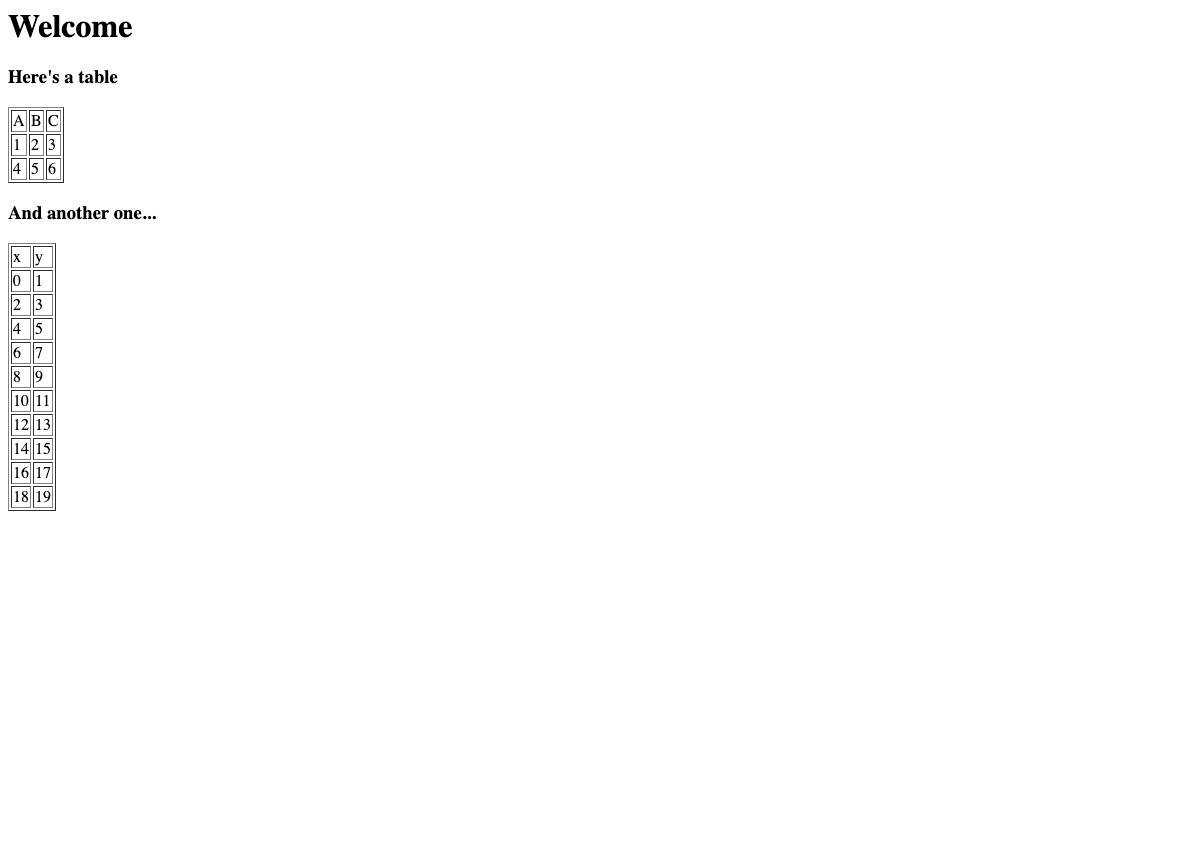

In [9]:
from IPython.core.display import Image
b.save_screenshot("out.png")
Image("out.png")

In [10]:
b.close()

# Example 2

In [11]:
b = webdriver.Chrome(options=options)

In [12]:
b.get("https://tyler.caraza-harter.com/cs320/s20/materials/lec-19/page2.html")

In [13]:
clicks = 0
while True:
    try:
        b.find_element_by_id("more").click()
        clicks += 1
    except NoSuchElementException:
        if clicks > 0:
            print("no more!")
            break
    time.sleep(1)

no more!


In [14]:
page = BeautifulSoup(b.page_source)
tables = page.find_all("table")
assert len(tables) == 1

html_tbl_to_df(tables[0])

['name', 'formed', 'dissipated', 'mph', 'damage', 'deaths']


,name,formed,dissipated,mph,damage,deaths
0,Baker,08/18/1950,09/01/1950,105,2.55M,38
1,Camille,08/14/1969,08/22/1969,175,1.42B,259
2,Eloise,09/13/1975,09/24/1975,125,560M,80
3,Frederic,08/29/1979,09/15/1979,130,1.77B,12
4,Elena,08/28/1985,09/04/1985,125,1.3B,9
5,Opal,09/27/1995,10/06/1995,150,4.7B,63
6,Danny,07/16/1997,07/27/1997,80,100M,4
7,Ivan,09/02/2004,09/25/2004,165,26.1B,92
8,Dennis,07/04/2005,07/18/2005,150,3.98B,76


In [15]:
b.close()

# Example 3

In [16]:
b = webdriver.Chrome(options=options)

In [17]:
b.get("https://tyler.caraza-harter.com/cs320/s20/materials/lec-19/page3.html")

In [18]:
elem = b.find_element_by_id("password")
elem

<selenium.webdriver.remote.webelement.WebElement (session="d925231b46735f2f5d9d1a770015de97", element="0.7687299970915622-1")>

In [19]:
elem.send_keys("fido")

In [20]:
btn = b.find_element_by_id("login_btn")
btn

<selenium.webdriver.remote.webelement.WebElement (session="d925231b46735f2f5d9d1a770015de97", element="0.7687299970915622-2")>

In [21]:
btn.click()

In [22]:
df = None
for i in range(10):
    page = BeautifulSoup(b.page_source)
    tables = page.find_all("table")
    assert len(tables) == 1
    df = html_tbl_to_df(tables[0])
    if not df is None:
        break
    time.sleep(1)
df

['name', 'formed', 'dissipated', 'mph', 'damage', 'deaths']


,name,formed,dissipated,mph,damage,deaths
0,Baker,08/18/1950,09/01/1950,105,2.55M,38
1,Camille,08/14/1969,08/22/1969,175,1.42B,259
2,Eloise,09/13/1975,09/24/1975,125,560M,80
3,Frederic,08/29/1979,09/15/1979,130,1.77B,12
4,Elena,08/28/1985,09/04/1985,125,1.3B,9
5,Opal,09/27/1995,10/06/1995,150,4.7B,63
6,Danny,07/16/1997,07/27/1997,80,100M,4
7,Ivan,09/02/2004,09/25/2004,165,26.1B,92
8,Dennis,07/04/2005,07/18/2005,150,3.98B,76
9,Katrina,08/23/2005,08/31/2005,175,125B,1245


In [23]:
b.close()

# Example 4

In [24]:
b = webdriver.Chrome(options=options)

In [25]:
b.get("https://tyler.caraza-harter.com/cs320/s20/materials/lec-19/page4.html")

In [26]:
year_elem = b.find_element_by_id("year")
year_elem

<selenium.webdriver.remote.webelement.WebElement (session="23edbc1968d77b1282a2953302e5bae7", element="0.42492850462712073-1")>

In [27]:
btn = b.find_element_by_id("search_btn")
btn

<selenium.webdriver.remote.webelement.WebElement (session="23edbc1968d77b1282a2953302e5bae7", element="0.42492850462712073-2")>

In [28]:
s = pd.Series()

for year in range(1950, 2010):
    year_elem.clear()
    year_elem.send_keys(str(year))
    btn.click()
    count = len(b.find_elements_by_tag_name("tr")) - 1
    s.loc[int(year)] = count
    #time.sleep(0.25)

In [29]:
ax = s.plot.line(fontsize=16)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.set_xlabel("Year")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

In [30]:
b.close()